In [5]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Star:
    def __init__(self, n, rho_c, polytropic_constant):
        
        self.n = n
        self.rho_c = rho_c
        self.K = polytropic_constant


    def set_radius(self, xi_R, a):
        self.R = a*xi_R

    def set_mass(self, M):
        self.M = M

In [7]:
class LaneEmdenSolver():
    
    def __init__(self, star, xi_max =10, step_points=10000):
        self.star = star
        self.xi_max = xi_max
        self.step_points = step_points


    def lane_emden(self, xi, y):
        """
        Lane-Emden equation formulated as a system of FODE
        dθ/dξ = - φ / ξ^2
        dφ/dξ = θ^n * ξ^2 
        """

        theta , psi = y
        
        if xi == 0:
            return [psi,0]
        else:
            dtheta_dxi = -psi / (xi**2)
            dpsi_dxi = (theta**self.star.n) * (xi**2)
            return [dtheta_dxi, dpsi_dxi]
        
    def solve(self):
        """
        Solve the Lane-Emden equation numerically
        """
        xi0 = 1e-5
        y0 = [1.0,0.0]
        
        solution  = integrate.solve_ivp(
            self.lane_emden,
            [xi0, self.xi_max],
            y0,
            method='RK45',
            t_eval= np.linspace(xi0, self.xi_max, self.step_points),
            atol=1e-10,
            rtol=1e-10
        )

        self.xi_values = solution.t
        self.theta_values = solution.y[0]
        self.psi_values = solution.y[1]


    def plot_solution(self):
        
        plt.plot(self.xi_values, self.theta_values, label=f'${self.star.n}$')
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$\theta(\xi)$')
        plt.title(f'Lane-Emden Solution for n={self.star.n}')
        plt.legend()
        plt.grid(True)
        




C:\Users\Lenovo ThinkPad\AppData\Local\Temp\ipykernel_24320\45276895.py:22: RuntimeWarning: invalid value encountered in scalar power
  dpsi_dxi = (theta**self.star.n) * (xi**2)


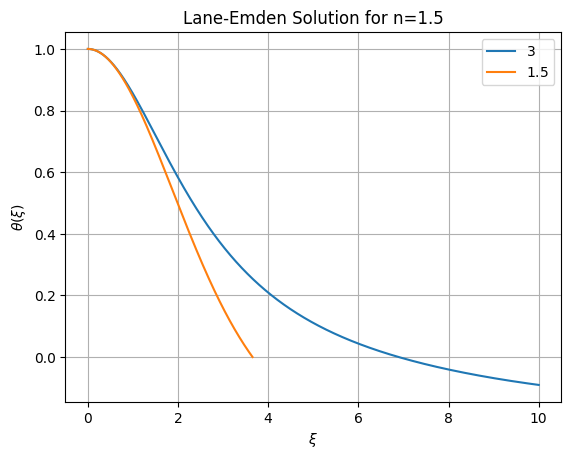

In [8]:
star1 = Star(n=3, rho_c = 1e-5, polytropic_constant=1.0)
star2 = Star(n=3/2, rho_c = 1e-5, polytropic_constant=1.0)

solver = LaneEmdenSolver(star1)
solver.solve()
solver.plot_solution()
solver = LaneEmdenSolver(star2)
solver.solve()
solver.plot_solution()

plt.show()